A monopoly insurer faces consumers of two risk types: A high risk consumer (h) will have an accident resulting in a monetary loss of $L$ with probability $a_h$ and a low risk consumer (l) will expereince the same loss only with probability $a_l<a_h$. The initial wealth of every consumer is $W$ and his Bernoulli utility function is $u$ which is assumed to be strictly increasing, strictly concave.

The insurer maximizes his expected profits by offering a menu of two contracts, where each of the two contracts is tartegeted at one risk type. A contract consists of an insurance premium $p$ and an indemnity payment $C$. A menu can therefore be represented by $(p_h,C_h,p_l,C_l)$.

A standard derivation implies that the profit maximizing menu will 
- give full coverage to the high risk type, i.e. $C_h=L$, and partial coverage to l, i.e. $C_l<L$
- leave the low risk type with zero rent, i.e. l is equally well off by buying insurance and not buying insurance
- leave h indifferent between his own contract and l's contract.

These three results imply that the only free variable over which the monopolist optimizes is $C_l$: For a given $C_l$, 
- $p_l$ is determined as the premium that makes l indifferent to not buying insurance,
- $p_h$ is such that h is indifferent between the two contracts (given that $C_h=L$).

We can therefore write the monopolist's profit maximization problem essentially as a maximization problem over one variable. However, we first have to define functions that solve the two indifference conditions for $p_l$ and $p_h$ for a given $C_l$. Below we do exactly this after first defining the parameters and fixing a utility function. Here we use the CARA utility:
$$u(x)=-e^{-x}$$
where $e$ is Euler's number.

In [1]:
# use a package that can determine the zeros of a function
using Roots
# use a package that can maximize a one-dimensional function
using Optim

#parameters described above
const W = 2.0
const L = 1.0
const al = 0.25
const ah = 0.5
const gamma = 0.3 # share of high risk types in the population

# Bernoulli utility function
u(x) = - ℯ^(-x)

#indifference condition l, determines p_l
function indiffl(Cl)
    uNoInsurance = al*u(W-L)+(1-al)*u(W) #expected utility without insurance
    uInsurance(p)= al*u(W-L-p+Cl)+(1-al)*u(W-p) # expected utility with insurance coverage Cl at premium p
    difference(p) = uInsurance(p)-uNoInsurance # expected utility difference between insurance and no insurance 
    return fzero(difference,0.05) # returns the premium at which difference is 0 using starting value 0.05
end

# indifference condition h, determines p_h
function indiffh(Cl)
    pl = indiffl(Cl) # get p_l from function indiffl
    uContractl = ah*u(W-L-pl+Cl)+(1-ah)*u(W-pl) #expected utility when buying l contract
    uContracth(p) = u(W-p) #expected utility when buying h contract; note by full insurance utility is same with and without loss
    difference(p) = uContracth(p)-uContractl # expected utility difference between insurance and no insurance 
    return fzero(difference,pl+0.05) # returns the premium at which difference is 0 using starting value pl+0.05
end

# profit for a given Cl
function profit(Cl)
    pl = indiffl(Cl)
    ph = indiffh(Cl)
    Ch = 1.0
    return (1-gamma)*(pl-al*Cl)+gamma*(ph-ah*Ch)
end

# profit maximization
Clstar = optimize(Cl-> -profit(Cl),0.0,L) #as the optimize command minimizes the function, I let it minimize -profit in the domain (0.0, L)
#obtaining optimal pl and ph from optimal Cl
plstar = indiffl(Clstar.minimizer)
phstar = indiffh(Clstar.minimizer)
# printing results
println("Optimal Cl is ",round(Clstar.minimizer;digits=3), "; Optimal pl is ",round(plstar;digits=3), "; Optimal ph is ",round(phstar;digits=3),)


Optimal Cl is 0.456; Optimal pl is 0.191; Optimal ph is 0.5


To illustrate the calculation above, we can plot profits as a function of $C_l$:

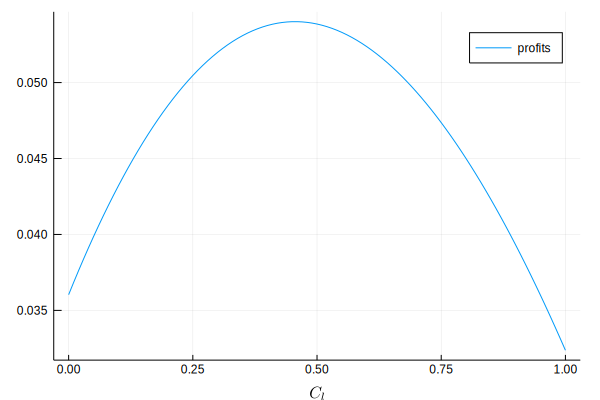

In [4]:
# use a package that can plot functions
using Plots
using LaTeXStrings

# plot profit function between 0 and L
plot(0:0.01:L,profit, label="profits",xlabel=L"$C_l$")